In [ ]:
pip install mediapipe_model_maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 29.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import files
import os
import tensorflow as tf
assert tf.__version__.startswith('2')

from mediapipe_model_maker import image_classifier

import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
image_path = tf.keras.utils.get_file(
    'flower_photos.tgz',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    extract=True
    )
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

228813984/228813984 [==============================] - 3s 0us/step


In [ ]:
print(image_path)
labels = []
for i in os.listdir(image_path):
  if os.path.isdir(os.path.join(image_path, i)):
    labels.append(i)
print(labels)

/root/.keras/datasets/flower_photos
['sunflowers', 'dandelion', 'roses', 'daisy', 'tulips']


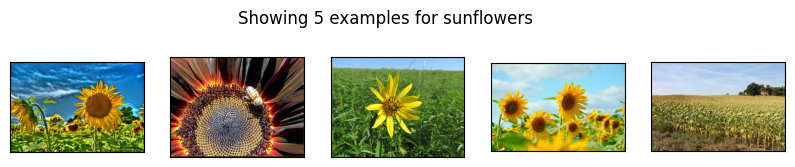

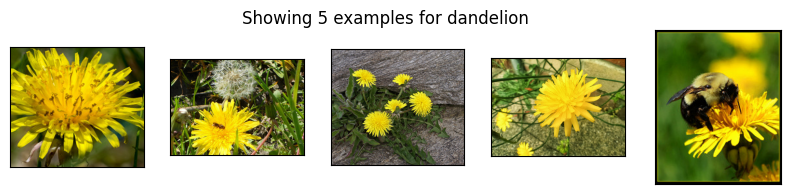

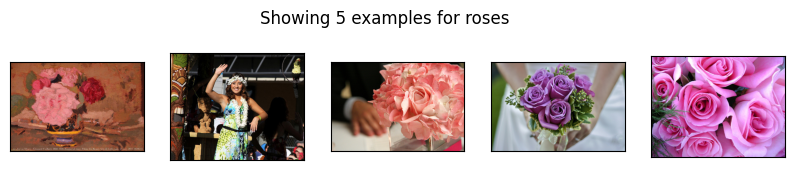

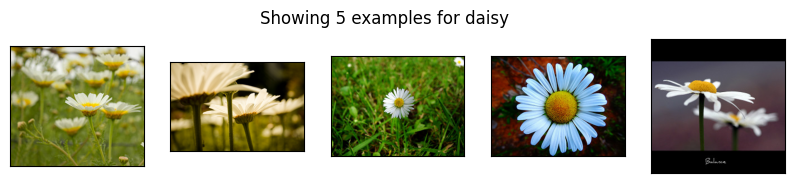

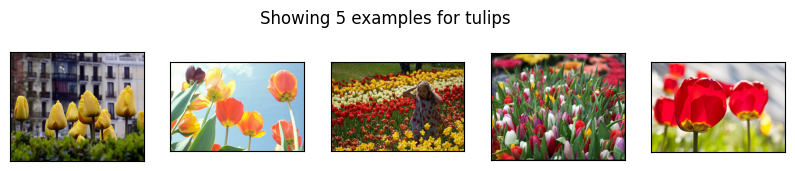

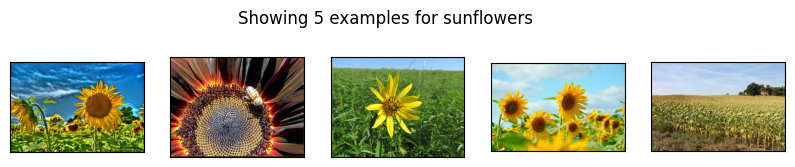

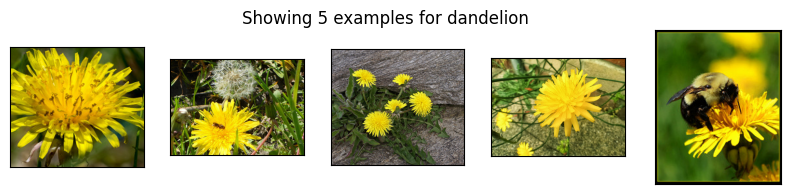

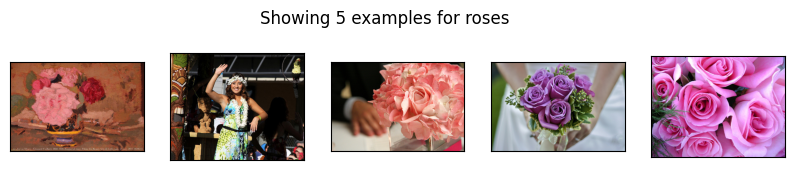

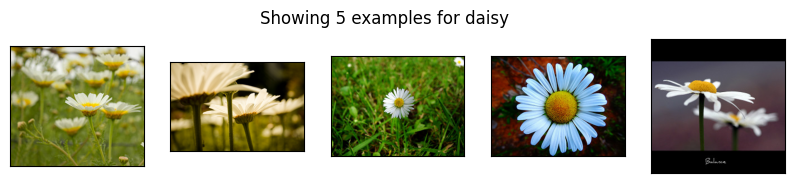

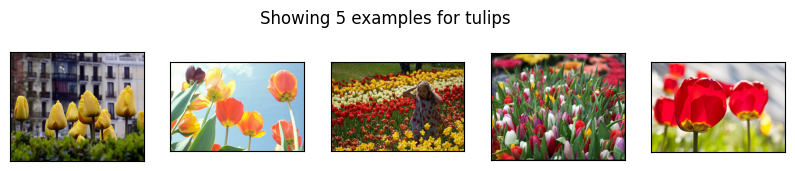

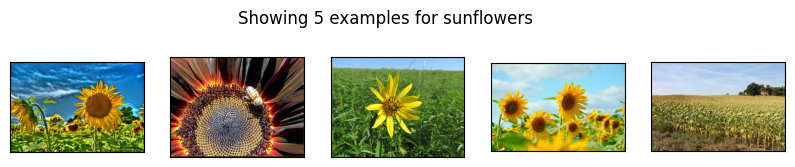

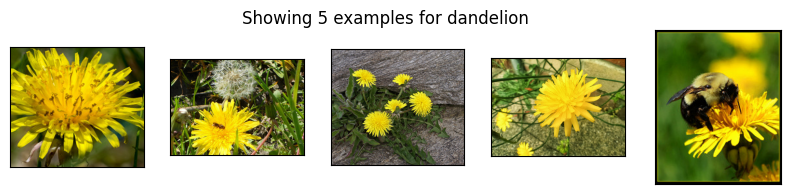

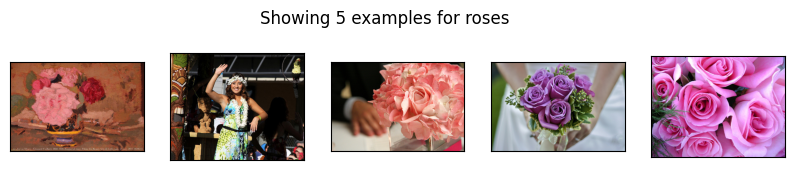

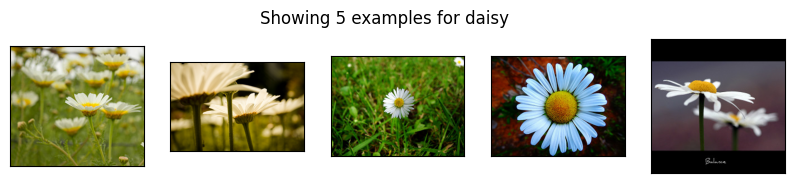

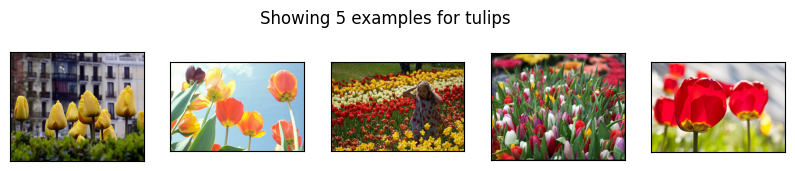

In [6]:
import os
import matplotlib.pyplot as plt
%matplotlib inline


NUM_EXAMPLES = 5

for label in labels:
  label_dir = os.path.join(image_path, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

In [7]:
data = image_classifier.Dataset.from_folder(image_path)
train_data, remaining_data = data.split(0.8)
test_data, validation_data = data.split(0.5)



In [8]:
spec = image_classifier.SupportedModels.MOBILENET_V2
hparams = image_classifier.HParams(export_dir = 'exported_model')
options = image_classifier.ImageClassifierOptions(supported_model=spec, hparams=hparams)

In [9]:

image_path2 = tf.keras.utils.get_file(
    'flower_photos.tgz',
    'https://www.kaggle.com/datasets/batoolabbas91/flower-photos-by-the-tensorflow-team',
    extract=True
    )
image_path2 = os.path.join(os.path.dirname(image_path2), 'flower_photos')
data = image_classifier.Dataset.from_folder(image_path2)
model = image_classifier.ImageClassifier.create(
    train_data = train_data,
    validation_data = validation_data,
    options=options,
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
None
Epoch 1/10
1468/1468 [==============================] - 177s 117ms/step - loss: 1.7491 - accuracy: 0.2858 - val_loss: 1.3268 - val_accuracy: 0.5134
Epoch 2/10
1468/1468 [==============================] - 191s 130ms/step - loss: 1.1954 - accuracy: 0.5817 - val_loss: 0.8873 - 

In [10]:
loss, acc = model.evaluate(test_data)
print(f'Test loss:{loss}, Test accuracy:{acc}')

58/58 [==============================] - 86s 1s/step - loss: 0.6551 - accuracy: 0.8910
Test loss:0.6550723910331726, Test accuracy:0.891008198261261


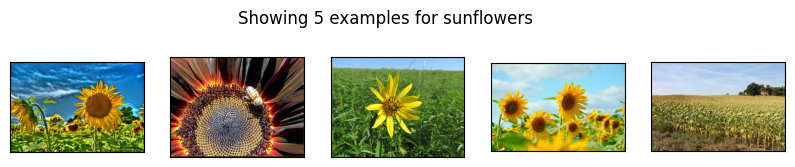

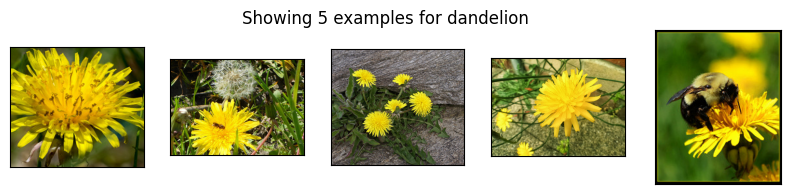

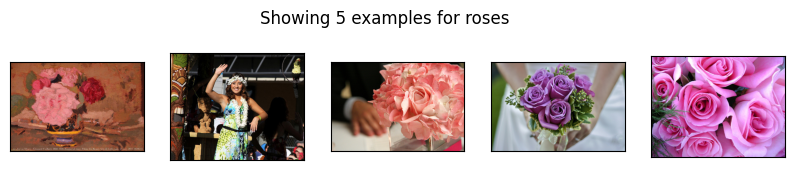

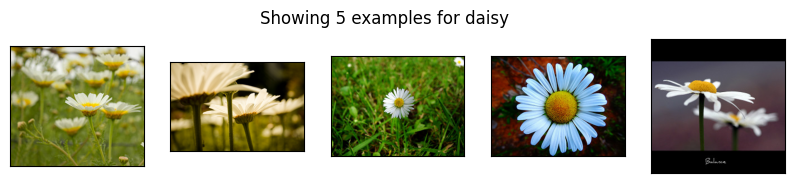

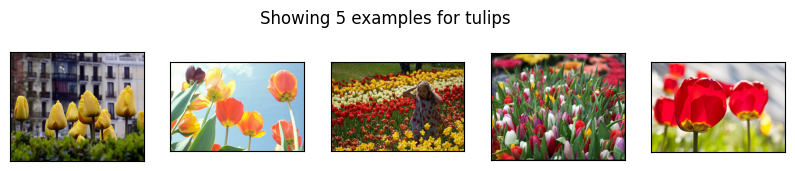

In [18]:
import os
import matplotlib.pyplot as plt
%matplotlib inline


NUM_EXAMPLES = 5

for label in labels:
  label_dir = os.path.join(image_path2, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

In [20]:
from mediapipe_model_maker import quantization

In [21]:
quantization_config = quantization.QuantizationConfig.for_int8(train_data)

In [23]:
model.export_model(model_name="model_int8.tflite", quantization_config=quantization_config)

TypeError: ignored